In [2]:
#Importaciones
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
#Función para obtener estadíticas de la imagen
def howis (img:np.ndarray) -> str:
    alto, ancho = img.shape[:2]
    canales = img.shape[2] if len(img.shape) == 3 else 1
    return f'Tamaño: {ancho}×{alto} px — Canales: {canales}\nMax: {np.max(img)} - Mín: {np.min(img)} - Avg: {np.mean(img):.1f}'

##Ejercicio 1: Espacios de Color

Usando una imagen a color de su elección:

a) Cargar la imagen con OpenCV y mostrar los canales BGR por separado. 

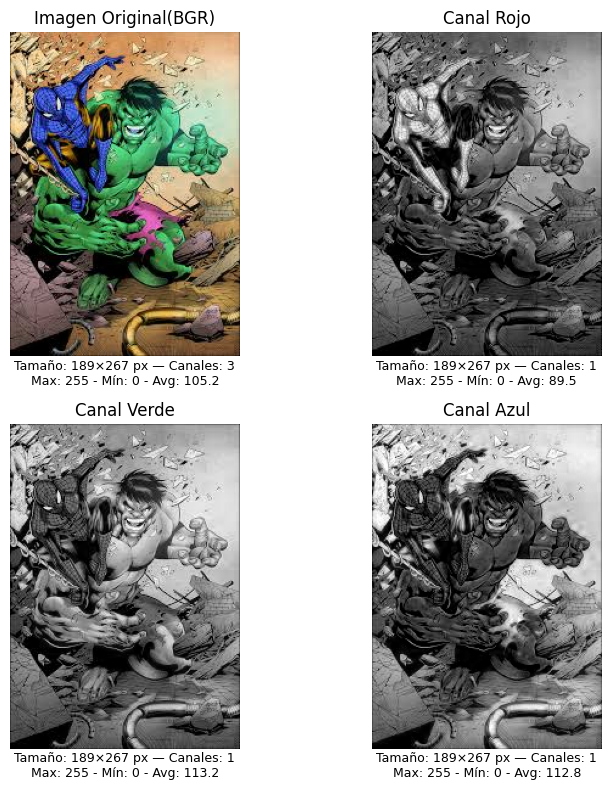

In [4]:
#Cargando Imagen
img = cv2.imread('HulkSpiderman.jpg')
#Obteniendo Canales
imgG = img[:,:,1] 
imgB = img[:,:,0]
imgR = img[:,:,2] 
#mostrando las imágenes
# Crear figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()
# Armo las listas con los parámetros de cada imagen
titles = ['Imagen Original(BGR)', 'Canal Rojo', 'Canal Verde', 'Canal Azul']
images = [img, imgR, imgG, imgB]
cmaps = [None, 'gray', 'gray', 'gray']

for i in range(4):
    axes[i].imshow(images[i], cmap=cmaps[i])
    axes[i].set_title(titles[i])
    axes[i].axis('off')  
    axes[i].text(
        0.5, -0.01, howis(images[i]),
        transform=axes[i].transAxes,
        fontsize=9,
        ha='center',
        va='top'
    )

plt.tight_layout()
plt.show()

b) Identificar cuál de los tres canales tiene mayor información basándose en los valores promedio.

Los Canales Verdes y Azul tienen mayor información (Avg: 113.2 y 112.8 respectivamente) que el Rojo (Avg:89.5)

c) Convertir la imagen de BGR a RGB y explicar por qué los colores se ven diferentes antes y después de la conversión.

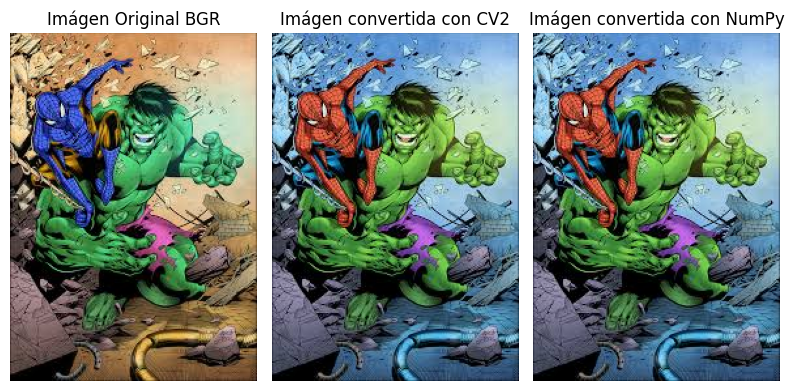

In [5]:
#OPCION 1 - Usando el método de la libería CV2
imgRGB1 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#OPCION 2 - Intercambiando el orden de las matrices
imgRGB2 = img[:,:,::-1]

#Mostrando las imagenes
fig, axes = plt.subplots(1, 3, figsize=(8, 8))
axes = axes.ravel()
axes[0].imshow(img)
axes[0].set_title("Imágen Original BGR")
axes[0].axis('off')  
axes[1].imshow(imgRGB1)
axes[1].set_title("Imágen convertida con CV2")
axes[1].axis('off') 
axes[2].imshow(imgRGB2)
axes[2].set_title("Imágen convertida con NumPy")
axes[2].axis('off')
plt.tight_layout()
plt.show()

Para visualizar las imágenes se está usando la librería Matplotlib... el método imshow asume que las matrices de los canales están ordenadas en orden RGB

Ejercicio 2: Muestreo y Cuantización


a) Aplicar muestreo espacial a una imagen con factores de 2, 4 y 8

In [6]:
#funcion para subsampling equidistante
def undersample(img: np.ndarray, d:int) -> np.ndarray:
    return img[::d,::d]

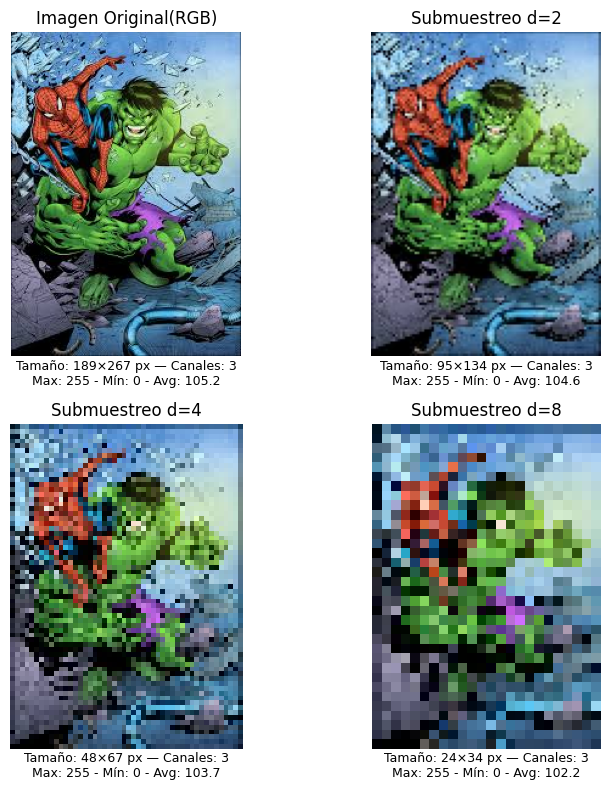

In [7]:
#Mostrando Muestreo espacial
# Crear figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()
# Armo las listas con los parámetros de cada imagen
titles = ['Imagen Original(RGB)', 'Submuestreo d=2', 'Submuestreo d=4', 'Submuestreo d=8']
images = [imgRGB1, undersample(imgRGB1,2), undersample(imgRGB1,4), undersample(imgRGB1,8)]
cmaps = [None, None, None, None]
subtexts = ["subtext2", "subtext3", "subtext4","subtext5"]

for i in range(4):
    axes[i].imshow(images[i], cmap=cmaps[i])
    axes[i].set_title(titles[i])
    axes[i].axis('off')  
    axes[i].text(
        0.5, -0.01, howis(images[i]),
        transform=axes[i].transAxes,
        fontsize=9,
        ha='center',
        va='top'
    )

plt.tight_layout()
plt.show()

b) Para cada caso, calcular:
El nuevo tamaño de la imagen
El porcentaje de reducción de datos 

In [8]:
for i in range(4):
    alto, ancho = images[i].shape[:2]
    print(f'{titles[i]} - Tamaño: {ancho}×{alto} px - Pérdida de Datos: {(1-images[i].size/imgRGB1.size)*100:.1f}%')

Imagen Original(RGB) - Tamaño: 189×267 px - Pérdida de Datos: 0.0%
Submuestreo d=2 - Tamaño: 95×134 px - Pérdida de Datos: 74.8%
Submuestreo d=4 - Tamaño: 48×67 px - Pérdida de Datos: 93.6%
Submuestreo d=8 - Tamaño: 24×34 px - Pérdida de Datos: 98.4%


c) Aplicar cuantización con 4 niveles diferentes (32, 64, 128, 256) 

In [9]:
#Funcion para Cuantización de Grises
def ScaleGray(img: np.ndarray, grises: int) -> np.ndarray:
    d = int(256/grises)
    return (img // d ) *d


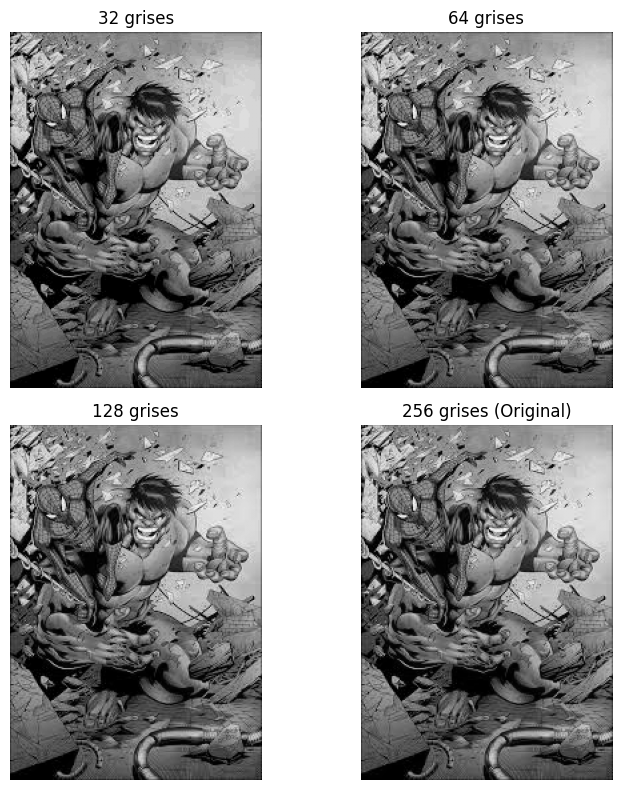

In [10]:
#Paso la imagen a Grises
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Mostrando la cuantización de Grises
# Crear figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()
# Armo las listas con los parámetros de cada imagen
titles = ['32 grises', '64 grises', '128 grises', '256 grises (Original)']
images = [ScaleGray(imgGray, 32), ScaleGray(imgGray, 64), ScaleGray(imgGray, 128), imgGray]
cmaps = ['gray', 'gray', 'gray', 'gray']

for i in range(4):
    axes[i].imshow(images[i], cmap=cmaps[i])
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

No se aprecian a simple vista diferencias muy significativas, por lo que voy a probar con 2, 4, 8 y 16 grises

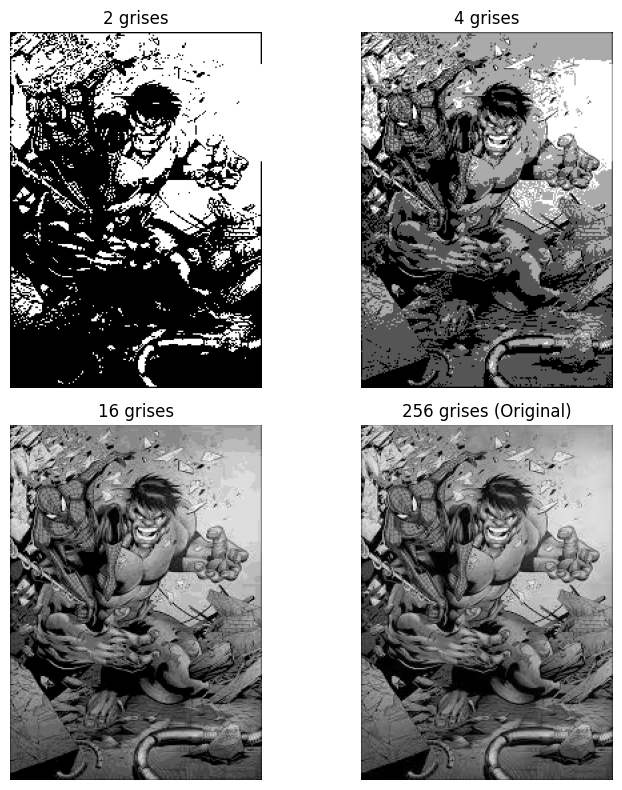

In [11]:
#Mostrando la cuantización de Grises
# Crear figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()
# Armo las listas con los parámetros de cada imagen
titles = ['2 grises', '4 grises', '16 grises', '256 grises (Original)']
images = [ScaleGray(imgGray, 2), ScaleGray(imgGray, 4), ScaleGray(imgGray, 16), imgGray]
cmaps = ['gray', 'gray', 'gray', 'gray']

for i in range(4):
    axes[i].imshow(images[i], cmap=cmaps[i])
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Recien a los 16 grises (en esta imagen y para mi ojo y me monitor en particular) se observan diferencia significativas respecto al original

AHora voy a tratar de segmentar a HULK

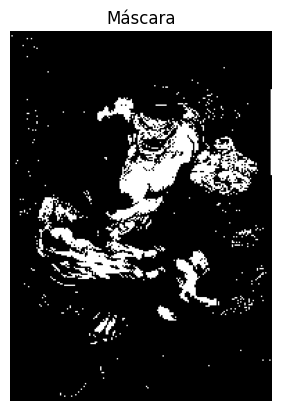

In [12]:
#declaro los par+ametros de sensibilidad del filtro
r_max = 150
b_max = 150
g_min = 130

# Creamos una máscara donde me quedo con los pixeles que tienen predominancia verde
mascara = (imgR <= r_max) & (imgG >= g_min) & (imgB <= b_max)

# Convertimos la máscara a uint8 para mostrarla
masked = np.uint8(mascara) * 255  

#imprimo la imagen binaria creada
plt.imshow(masked, cmap='gray')
plt.title("Máscara")
plt.axis('off')
plt.show()

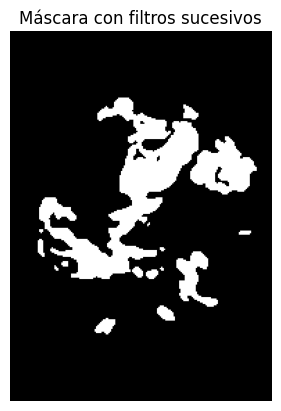

In [13]:
thresh = 100 # Valor que separa de los blancos y los negros despues de cada iteracion
iteraciones = 3
kernel = (5,5)

masked_blur = np.copy(masked)

for i in range(iteraciones):
    masked_blur = cv2.GaussianBlur(masked_blur,kernel,0)
    masked_blur = np.where(masked_blur > thresh, 255, 0).astype(np.uint8)


#imprimo la imagen binaria creada
plt.imshow(masked_blur, cmap='gray')
plt.title("Máscara con filtros sucesivos")
plt.axis('off')
plt.show()

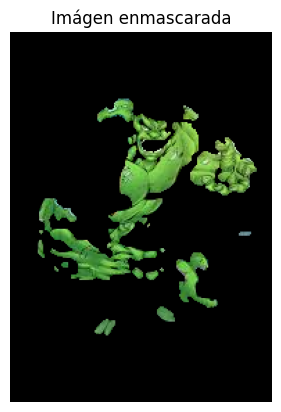

In [14]:
#Generao la máscara binaria a partir de la máscara procesada
mascara_binaria = (masked_blur > 0).astype(np.uint8)

#Expando la máscara a los tres canales
mascara_rgb = np.stack([mascara_binaria]*3, axis=-1)

# Aplica la máscara
imagen_enmascarada = imgRGB1 * mascara_rgb


#imprimo la imagen enmascarada
plt.imshow(imagen_enmascarada)
plt.title("Imágen enmascarada")
plt.axis('off')
plt.show()

Histograma de la imagen en escala de grises

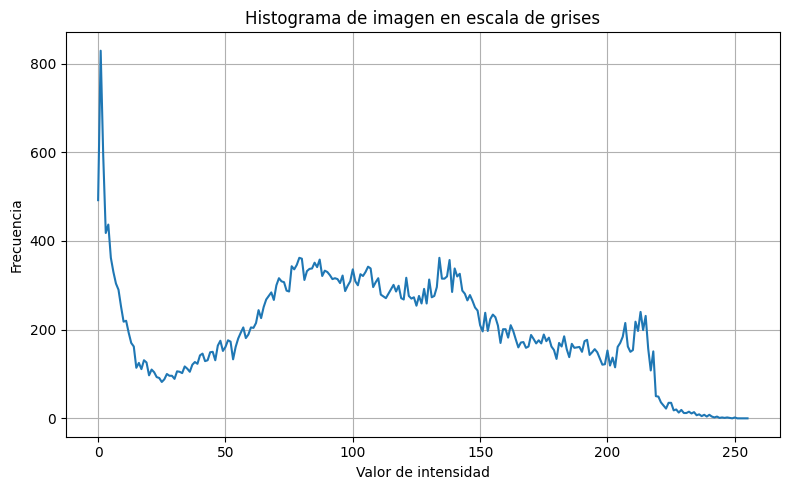

In [15]:
plt.figure(figsize=(8, 5))

histograma, bins = np.histogram(imgGray, bins=256, range=(0, 256))
plt.plot(bins[:-1], histograma)

plt.title('Histograma de imagen en escala de grises')
plt.xlabel('Valor de intensidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

Determinar las ccordenadas de rectángulo de la imagen seccionada

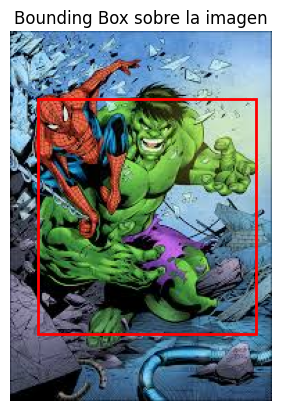

In [16]:
# Recorrer la imagen para encontrar las filas y columnas donde hay píxeles blancos (valor 255)
ys, xs = np.where(masked_blur == 255)

# Obtener los límites del objeto
top, bottom = ys.min(), ys.max()
left, right = xs.min(), xs.max()

# Dibujar el rectángulo sobre una copia de la imagen original
fig, ax = plt.subplots()
ax.imshow(imgRGB1, cmap='gray')
width = right - left
height = bottom - top
rect = plt.Rectangle((left, top), width, height, edgecolor='red', facecolor='none', linewidth=2)
ax.add_patch(rect)

plt.title('Bounding Box sobre la imagen')
plt.axis('off')
plt.show()

Generando los contornos de la figura

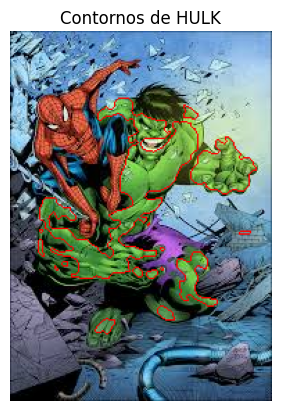

In [17]:
#Contornos
contornos, _ = cv2.findContours(masked_blur, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


imgAux = imgRGB1.copy() 

# Paso 3: dibujar los contornos sobre la imagen
cv2.drawContours(imgAux, contornos, -1, color=(255, 0, 0), thickness=1) 

# Paso 4: mostrar la imagen con bordes
plt.imshow(imgAux)
plt.title("Contornos de HULK")
plt.axis('off')
plt.show()

Voy a Probar un enfoque diferente, ya que el verde de HULK parece tener el mismo matiz y solo difiere en brillo y saturacion

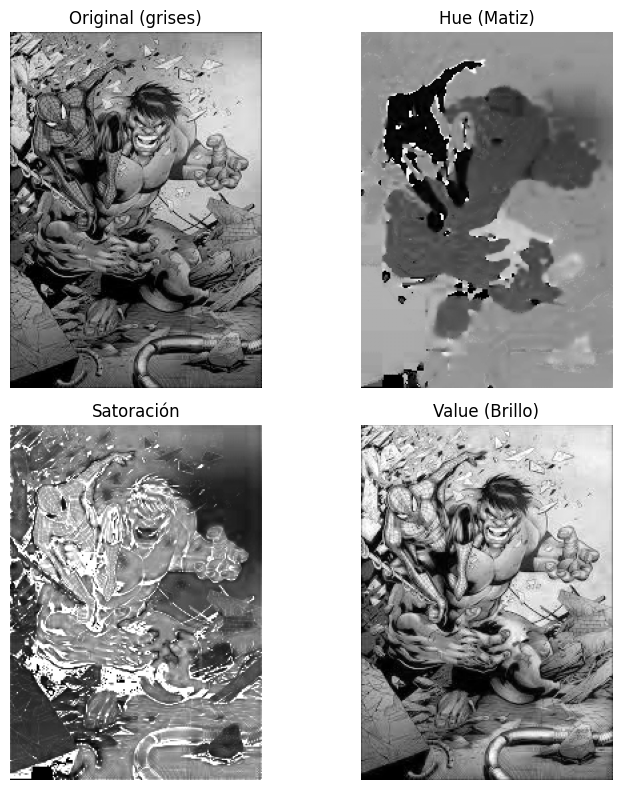

In [18]:
#Cargo la imagen en HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
axes = axes.ravel()
# Armo las listas con los parámetros de cada imagen
titles = ['Original (grises)', 'Hue (Matiz)', 'Satoración', 'Value (Brillo)']
images = [imgGray, hsv[:,:,0], hsv[:,:,1], hsv[:,:,2]]
cmaps = ['gray', 'gray', 'gray', 'gray']

for i in range(4):
    axes[i].imshow(images[i], cmap=cmaps[i])
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

En el Canal de Matiz, se oberva una diferenciación clara, para ver en que valores voy a ver el histograma

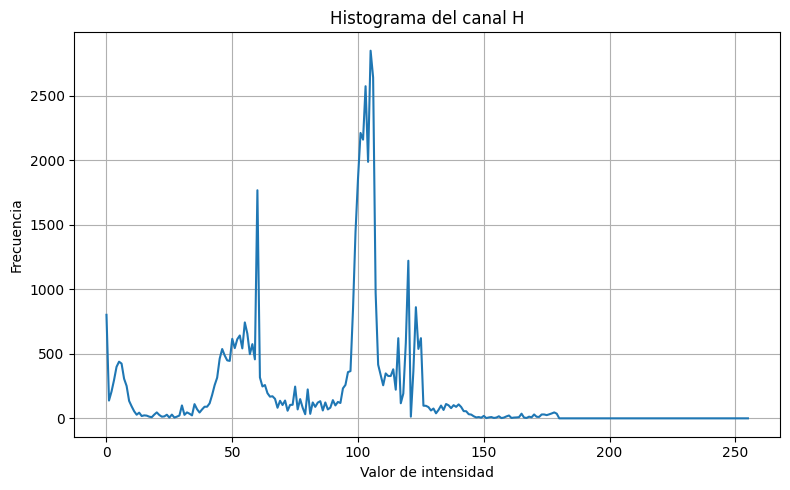

In [19]:
plt.figure(figsize=(8, 5))

histograma, bins = np.histogram(hsv[:,:,0], bins=256, range=(0, 256))
plt.plot(bins[:-1], histograma)

plt.title('Histograma del canal H')
plt.xlabel('Valor de intensidad')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.tight_layout()
plt.show()

Los valores de Matiz correspondintes al color de HULK están aproximádamente entre los valores 40 y 65. Usemos este rango para generar una máscara

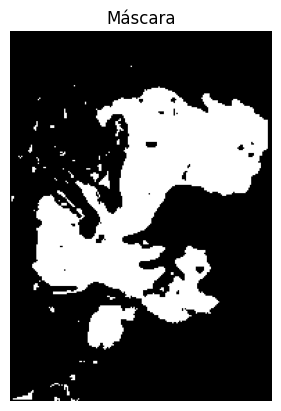

In [22]:
#declaro los par+ametros de sensibilidad del filtro
H_min = 30
H_max = 75

# Creamos una máscara donde me quedo con los pixeles que tienen predominancia verde
H_mask = (hsv[:,:,0] <= H_max) & (hsv[:,:,0] >= H_min)

# Convertimos la máscara a uint8 para mostrarla
H_masked = np.uint8(H_mask) * 255  

#imprimo la imagen binaria creada
plt.imshow(H_masked, cmap='gray')
plt.title("Máscara")
plt.axis('off')
plt.show()

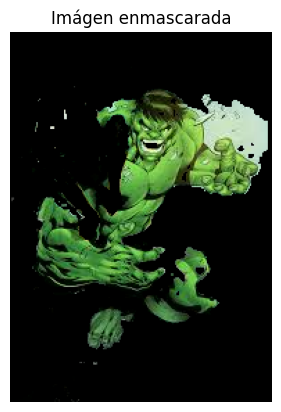

In [23]:
#Generao la máscara binaria a partir de la máscara procesada
mascara_binaria = (H_masked > 0).astype(np.uint8)

#Expando la máscara a los tres canales
mascara_rgb = np.stack([mascara_binaria]*3, axis=-1)

# Aplica la máscara
imagen_enmascarada = imgRGB1 * mascara_rgb


#imprimo la imagen enmascarada
plt.imshow(imagen_enmascarada)
plt.title("Imágen enmascarada")
plt.axis('off')
plt.show()

Al parecer parte del fondo tiene un matiz muy parecido a Hulk, pero con muy poca saturación, voy a sumar a la ecuación lógica un umbral de saturación

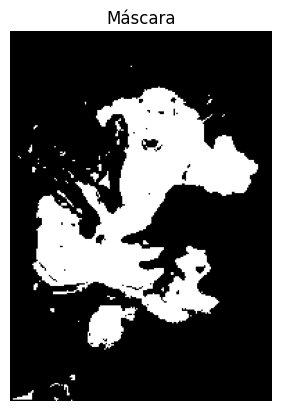

In [40]:
#declaro los par+ametros de sensibilidad del filtro
H_min = 30
H_max = 75
S_min = 60

# Creamos una máscara donde me quedo con los pixeles que tienen predominancia verde
H_mask = (hsv[:,:,0] <= H_max) & (hsv[:,:,0] >= H_min) & (hsv[:,:,1] >= S_min)

# Convertimos la máscara a uint8 para mostrarla
H_masked = np.uint8(H_mask) * 255  

#imprimo la imagen binaria creada
plt.imshow(H_masked, cmap='gray')
plt.title("Máscara")
plt.axis('off')
plt.show()

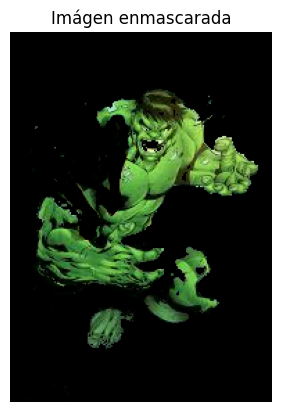

In [42]:
#Generao la máscara binaria a partir de la máscara procesada
mascara_binaria = (H_masked > 0).astype(np.uint8)

#Expando la máscara a los tres canales
mascara_rgb = np.stack([mascara_binaria]*3, axis=-1)

# Aplica la máscara
imagen_enmascarada = imgRGB1 * mascara_rgb


#imprimo la imagen enmascarada
plt.imshow(imagen_enmascarada)
plt.title("Imágen enmascarada")
plt.axis('off')
plt.show()